In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

from datetime import datetime

#import contractions
#import langdetect
#from langdetect import detect
#import emot
#from emot.emo_unicode import EMOTICONS_EMO, UNICODE_EMOJI

import re
import pickle
import string
import os

#Modelling
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#os.chdir('/Users/michelleyuu/Desktop/data270/data')

In [4]:
harassment = pd.read_csv('Harassment Lexicon.csv')
harassment

,Sexual,Racial,Appearance,Intelligence,Politics,Generic
0,amateur,abbo,alla,cockbite,anal,assbite
1,AnalAnnie,abo,big ass,Cockmuncher,anus,asscock
2,Angie,African Forklift,camel toe,demon,arse,asses
3,Aroused,Alligator Bait,Chesticles,demonrats,asian,assface
4,assblaster,arab,cock waffle,dickwad,ass-hat,asshat
...,...,...,...,...,...,...
447,wankjob,NaN,NaN,NaN,NaN,NaN
448,wetspot,NaN,NaN,NaN,NaN,NaN
449,whore,NaN,NaN,NaN,NaN,NaN
450,whorefucker,NaN,NaN,NaN,NaN,NaN


In [5]:
data = pd.read_csv('sentiment140_clean.csv') 

In [6]:
data.shape

(1600000, 16)

In [7]:
data[data['tokenized_words'].isna()]

,sentiment,id,date,user,text,text_lower,text_no_stop,tokenized_words,sexual,racial,appearance,intelligence,politics,generic,label,encoded_label
83,0,1467834265,Mon Apr 06 22:25:54 PDT 2009,mike_webster_au,@markhardy1974 Me too #itm,@markhardy1974 me too #itm,,NaN,0,0,0,0,0,0,Noncyberbullying,0
135,0,1467842448,Mon Apr 06 22:28:05 PDT 2009,R_Boucher,Agh...snow!!!,agh...snow!!!,NaN,NaN,0,0,0,0,0,0,Noncyberbullying,0
151,0,1467844505,Mon Apr 06 22:28:38 PDT 2009,luimoral85,I don't understand... I really don't,i don't understand... i really don't,NaN,NaN,0,0,0,0,0,0,Noncyberbullying,0
191,0,1467859666,Mon Apr 06 22:32:31 PDT 2009,DreamActivist23,@HillyDoP oH NO,@hillydop oh no,NaN,NaN,0,0,0,0,0,0,Noncyberbullying,0
208,0,1467863072,Mon Apr 06 22:33:25 PDT 2009,Artiel87,@mandayyy,@mandayyy,NaN,NaN,0,0,0,0,0,0,Noncyberbullying,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599720,4,2193525714,Tue Jun 16 08:34:36 PDT 2009,EmilyatMeritain,@alwaysfurst See you there,@alwaysfurst see you there,NaN,NaN,0,0,0,0,0,0,Noncyberbullying,0
1599773,4,2193528265,Tue Jun 16 08:34:49 PDT 2009,Runwithsissorz,@ijustine hey,@ijustine hey,NaN,NaN,0,0,0,0,0,0,Noncyberbullying,0
1599811,4,2193550913,Tue Jun 16 08:36:39 PDT 2009,handriani,to be with you,to be with you,NaN,NaN,0,0,0,0,0,0,Noncyberbullying,0
1599914,4,2193575571,Tue Jun 16 08:38:41 PDT 2009,BeBo_Evilbunny,@PJA4ever Back..,@pja4ever back..,,NaN,0,0,0,0,0,0,Noncyberbullying,0


In [8]:
data = data.dropna()

In [9]:
data[data['tokenized_words'].isna()]

,sentiment,id,date,user,text,text_lower,text_no_stop,tokenized_words,sexual,racial,appearance,intelligence,politics,generic,label,encoded_label


In [10]:
# data_sample =  data[data['text'].str.contains('whore')].reset_index(drop=True)
df = data[['id', 'sentiment', 'tokenized_words','label', 'encoded_label']]


df.shape

(1586573, 5)

In [11]:
df

,id,sentiment,tokenized_words,label,encoded_label
0,1467810369,0,awww bummer david carr third day it d,Noncyberbullying,0
1,1467810672,0,upset update facebook texting might cry result...,Noncyberbullying,0
2,1467810917,0,dive many time ball manage save 50 rest bound,Noncyberbullying,0
3,1467811184,0,whole body feel itchy like fire,Noncyberbullying,0
4,1467811193,0,no behave all mad here there,Noncyberbullying,0
...,...,...,...,...,...
1599995,2193601966,4,wake up school best feel,Noncyberbullying,0
1599996,2193601969,4,cool hear old walt interview,Noncyberbullying,0
1599997,2193601991,4,ready mojo makeover ask detail,Noncyberbullying,0
1599998,2193602064,4,happy 38th birthday boo alll time tupac amaru ...,Noncyberbullying,0


In [12]:
df['label'].value_counts()

Noncyberbullying    1302381
sexual               144959
racial                74636
generic               33135
politics              22650
intelligence           7354
appearance             1458
Name: label, dtype: int64

In [13]:
df.drop(df.tail(86573).index,
        inplace = True)
df['label'].value_counts()


/Users/maggie/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Noncyberbullying    1230749
sexual               137313
racial                70883
generic               31314
politics              21315
intelligence           7040
appearance             1386
Name: label, dtype: int64

In [14]:
# df = df_sample[['id', 'sentiment', 'tokenized_words', 'sexual', 'racial', 'appearance', 'intelligence', 'politics', 'generic']]
# df.head()

In [15]:
corpus = df['tokenized_words']
corpus.head(4)

0                awww bummer david carr third day it d
1    upset update facebook texting might cry result...
2        dive many time ball manage save 50 rest bound
3                      whole body feel itchy like fire
Name: tokenized_words, dtype: object

In [16]:
#tfidf vectorizer

vectorizer = TfidfVectorizer(norm='l2', binary=True, dtype=np.float32)
reg_vec = vectorizer.fit_transform(df['tokenized_words'].values.astype('U'))
print(vectorizer.get_feature_names())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/Users/maggie/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
#Descriptive feature data
reg_vec

<1500000x310467 sparse matrix of type '<class 'numpy.float32'>'
	with 9165634 stored elements in Compressed Sparse Row format>

In [29]:
#create a dictionary (k-v pair of each word and value)
tsvd = TruncatedSVD(n_components=10, n_iter=10, random_state = 42) 
tsvd.fit(reg_vec)
tsvd_mat = tsvd.transform(reg_vec)

In [30]:
tsvd_df = pd.DataFrame(tsvd_mat)
tsvd_v = tsvd_df.values

min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
tsvd_scale = min_max_scaler.fit_transform(tsvd_v)

tsvd_s_df = pd.DataFrame(tsvd_scale)
tsvd_s_df['target'] = df['label']
tsvd_s_df['target_encoded'] = df['encoded_label']

In [31]:

# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True


# y = np.sort(reg_vec)

# plt.title("Line graph")
# plt.scatter(reg_vec, y, color="red")

# plt.show()

In [32]:
#Labels
df.head(4)

,id,sentiment,tokenized_words,label,encoded_label
0,1467810369,0,awww bummer david carr third day it d,Noncyberbullying,0
1,1467810672,0,upset update facebook texting might cry result...,Noncyberbullying,0
2,1467810917,0,dive many time ball manage save 50 rest bound,Noncyberbullying,0
3,1467811184,0,whole body feel itchy like fire,Noncyberbullying,0


In [33]:
label = df['encoded_label']
label.head(3)

0    0
1    0
2    0
Name: encoded_label, dtype: int64

In [34]:
# features = tfidf.fit_transform(df2.Consumer_complaint).toarray()
# labels = df2.category_id

X = df['tokenized_words'] # Collection of documents
y = df['label'] # Target or the labels we 


X = tsvd_s_df.drop(['target', 'target_encoded'], axis = 1)
y = tsvd_s_df.target_encoded

#x = df['tokenized_words']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state = 42)

In [36]:
X_train.shape

(750000, 10)

In [37]:
#checking train-test split

print(df['tokenized_words'].shape)
print(X_train.shape)
print(X_test.shape)

(1500000,)
(750000, 10)
(750000, 10)


# Modelling

In [38]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(reg_vec, label, df.index, test_size=0.7, random_state=1)

In [39]:
X_train.shape

(450000, 310467)

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# training the model
clf.fit(X_train, y_train)

/Users/maggie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
#Predicting the output
y_pred = clf.predict(X_test)

In [33]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
# Classification report

print('ttttCLASSIFICATIION METRICSn')
print(metrics.classification_report(y_test, y_pred, target_names= df['label'].unique()))

ttttCLASSIFICATIION METRICSn
                  precision    recall  f1-score   support

Noncyberbullying       0.97      1.00      0.98    861418
        politics       0.98      0.32      0.49       989
          racial       0.94      0.79      0.86     21946
          sexual       0.96      0.76      0.85      4946
      appearance       0.96      0.74      0.84     14902
         generic       0.98      0.89      0.93     49947
    intelligence       1.00      0.85      0.92     95852

        accuracy                           0.97   1050000
       macro avg       0.97      0.76      0.84   1050000
    weighted avg       0.97      0.97      0.97   1050000



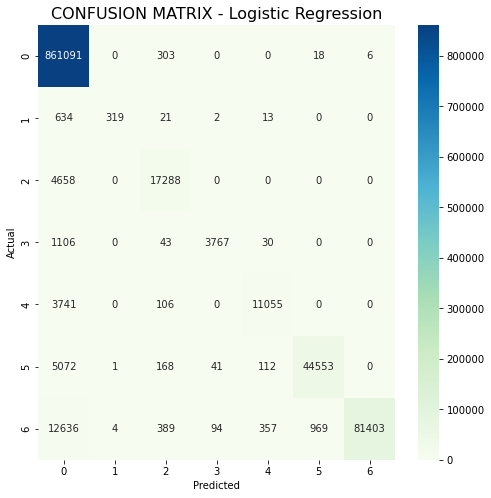

In [41]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="GnBu", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - Logistic Regression", size=16);

In [42]:
##

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
classifier = DecisionTreeClassifier()


In [45]:
classifier = classifier.fit(X_train,y_train)

In [46]:
#prediction
y_pred = classifier.predict(X_test)

In [47]:
classifier = classifier.fit(X_train,y_train)

### Multinomial Naive Bayes

In [40]:
#Training the Naive Bayes model on the training set
from sklearn.naive_bayes import MultinomialNB


In [41]:
classifier = MultinomialNB()


In [42]:
classifier.fit(X_train, y_train)


MultinomialNB()

In [43]:
y_pred  =  classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
# Classification report

print('ttttCLASSIFICATIION METRICS for Naive Bayesn')
print(metrics.classification_report(y_test, y_pred, target_names= df['label'].unique()))
print('        Classification Metrics: Naive Bayes- Multinomial  ')

ttttCLASSIFICATIION METRICS for Naive Bayesn


/Users/maggie/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

Noncyberbullying       0.84      1.00      0.91    861418
        politics       0.00      0.00      0.00       989
          racial       1.00      0.02      0.03     21946
          sexual       0.00      0.00      0.00      4946
      appearance       1.00      0.01      0.01     14902
         generic       1.00      0.08      0.15     49947
    intelligence       0.92      0.18      0.31     95852

        accuracy                           0.84   1050000
       macro avg       0.68      0.18      0.20   1050000
    weighted avg       0.86      0.84      0.78   1050000

        Classification Metrics: Naive Bayes- Multinomial  


/Users/maggie/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maggie/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


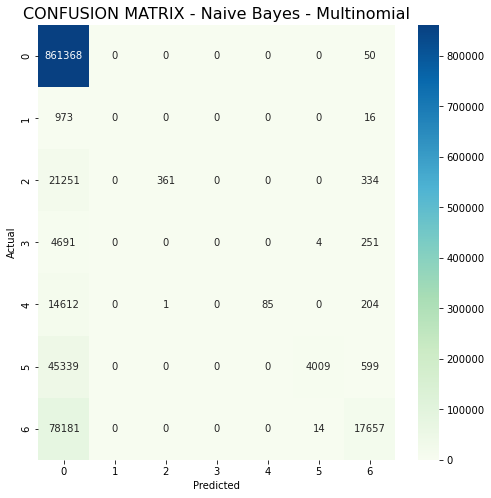

In [45]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="GnBu", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - Naive Bayes - Multinomial", size=16);

In [54]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [46]:
import scikitplot as skplt

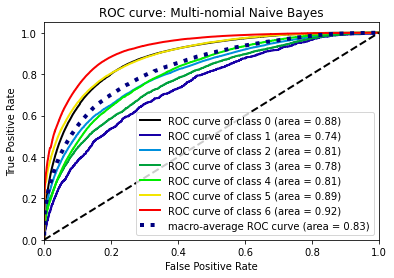

In [47]:
skplt.metrics.plot_roc(y_test, classifier.predict_proba(X_test),plot_micro=False)
plt.title('ROC curve: Multi-nomial Naive Bayes')
plt.show()

In [57]:
from sklearn.metrics import roc_curve

In [58]:
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test_res, random_probs, pos_label=1)

fpr = {}
tpr = {}
thresh ={}

n_class = 7

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred, pos_label=i)


plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Noncyberbullying')

plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Sexual')

plt.plot(fpr[2], tpr[2], linestyle='--',color='yellow', label='Racial')

plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label='Generic')

plt.plot(fpr[4], tpr[4], linestyle='--',color='orange', label='Politics')

plt.plot(fpr[5], tpr[5], linestyle='--',color='indigo', label='Intelligence')

plt.plot(fpr[6], tpr[6], linestyle='--',color='violet', label='Appearance')

plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve: Multi-nomial Naive Bayes')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

NameError: name 'y_test_res' is not defined

In [ ]:
#F1 Score
# Precision-Recall
# Confusion Matrix
# Roc Curve


In [ ]:
#F1 Score

from sklearn.metrics import f1_score
f1_score(y_test, y_pred,  average=None)

In [ ]:
#Accuracy score

from sklearn.metrics import accuracy_score

ac = accuracy_score(y_test, y_pred)
ac

In [ ]:
#roc

In [ ]:
#precision recall curve